**Machine Learning project using the Churn Modelling Dataset**

In [ ]:
#importing python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
#Selecting appropriate columns
column_selector = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                   'IsActiveMember', 'EstimatedSalary', 'Exited']
dataset = dataset[column_selector]
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Pre-processing**

In [ ]:
#removal of outliers
def remove_outlier(feature):
    first_q = np.percentile(dataset[feature],25)
    third_q = np.percentile(dataset[feature],75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR
    maximum = third_q + IQR

    mean = dataset[feature].median()

    dataset.loc[dataset[feature] < minimum, feature] = mean
    dataset.loc[dataset[feature] > maximum, feature] = mean

outliers = ["CreditScore", "Age", "NumOfProducts"]

for i in range(len(outliers)):
    remove_outlier(outliers[i])

#Scale data
column_normalize_selector = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scalar = MinMaxScaler()
dataset[column_normalize_selector] = scalar.fit_transform(dataset[column_normalize_selector])


# convert categorical to one hot

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

X

array([[1.0, 0.0, 0.0, ..., 1, 1, 0.5067348931822989],
       [0.0, 0.0, 1.0, ..., 0, 1, 0.5627087386845444],
       [1.0, 0.0, 0.0, ..., 1, 0, 0.5696543519906151],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 0.21039009225381022],
       [0.0, 1.0, 0.0, ..., 1, 0, 0.46442905297455905],
       [1.0, 0.0, 0.0, ..., 1, 0, 0.1909142323091855]], dtype=object)

In [ ]:
# Splitting the data in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Implementing 4 classification algorithms :**

**1) NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = nb.predict(X_test)
cm_naive_bayes = confusion_matrix(y_test, y_pred)
acc_score_naive_bayes=accuracy_score(y_test,y_pred)
print("The confusion matrix :\n",cm_naive_bayes)
print("The accuracy score is : ",acc_score_naive_bayes)

The confusion matrix :
 [[1799  192]
 [ 293  216]]
The accuracy score is :  0.806


**2) SUPPORT VECTOR MACHINES**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred)
acc_score_svm=accuracy_score(y_test,y_pred)
print("The confusion matrix :\n",cm_svm)
print("The accuracy score is : ",acc_score_svm)

The confusion matrix :
 [[1991    0]
 [ 509    0]]
The accuracy score is :  0.7964


***3) K NEAREST NEIGHBORS***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
acc_score_knn=accuracy_score(y_test,y_pred)
print("The confusion matrix :\n",cm_knn)
print("The accuracy score is : ",acc_score_knn)

The confusion matrix :
 [[1859  132]
 [ 307  202]]
The accuracy score is :  0.8244


**4) RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)
cm_random_forest = confusion_matrix(y_test, y_pred)
acc_score_random_forest=accuracy_score(y_test,y_pred)
print("The confusion matrix :\n",cm_random_forest)
print("The accuracy score is : ",acc_score_random_forest)

The confusion matrix :
 [[1903   88]
 [ 280  229]]
The accuracy score is :  0.8528


**Visualizing the output :**

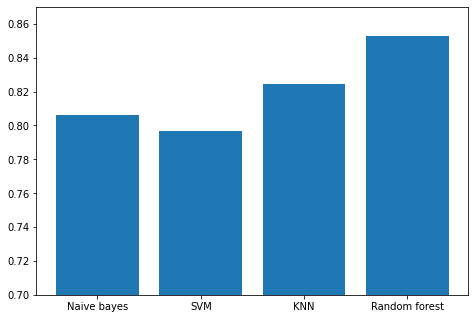

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Naive bayes', 'SVM', 'KNN', 'Random forest']
students = [acc_score_naive_bayes,acc_score_svm,acc_score_knn,acc_score_random_forest]
ax.bar(langs,students)
plt.ylim(0.70,0.87)
plt.show()

**Generate pickle file for each model**

In [ ]:
from sklearn.externals import joblib
joblib.dump(nb, 'naive-bayes.pkl')
joblib.dump(svm, 'svm.pkl')
joblib.dump(knn, 'knn.pkl')
joblib.dump(rf, 'randomforest.pkl')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['randomforest.pkl']

In [ ]:
from google.colab import files
files.download('randomforest.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
filename =
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
files.download( 'finalized_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>